# **Space X  Falcon 9 First Stage Landing Prediction**


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch. In this part, We will create a machine learning pipeline to predict if the first stage will land given the data from the preceding parts.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Below given function is to plot the confusion matrix.

In [2]:
def plot_confusion_matrix(y,y_predict):
    
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [3]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"
X = pd.read_csv(URL1)
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [4]:
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(URL2)
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


Createing a NumPy array from the column Class in data, by applying the method to_numpy() then assign it to the variable Y,making sure the output is a Pandas series

In [5]:
Y = data['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.

In [6]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)
X

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -8.35531692e-01, -5.17306132e-01,  5.17306132e-01]])

Now, we split the data into training and testing data using the function train_test_split. The training data is divided into validation data, a second set used for training data; then the models are trained and hyperparameters are selected using the function GridSearchCV.

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

we can see we only have 18 test samples.


In [8]:
Y_test.shape

(18,)

## Logistic Regression Model

Creating a logistic regression object  then creating a  GridSearchCV object  <code>logreg_cv</code> with cv = 10. After thst Fitting the object to find the best parameters from the dictionary <code>parameters</code>.


In [9]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [10]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()


In [11]:
logreg_cv = GridSearchCV(lr, parameters, cv=10)

In [12]:
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We displayed the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


Now, we Calculate the accuracy on the test data using the method <code>score</code>:


In [13]:
Y_pred = logreg_cv.predict(X_test)
accuracy_lr = accuracy_score(Y_test, Y_pred)
print(f'Accuracy on the test data: {accuracy_lr:.4f}')

Accuracy on the test data: 0.9444


Lets look at the confusion matrix:


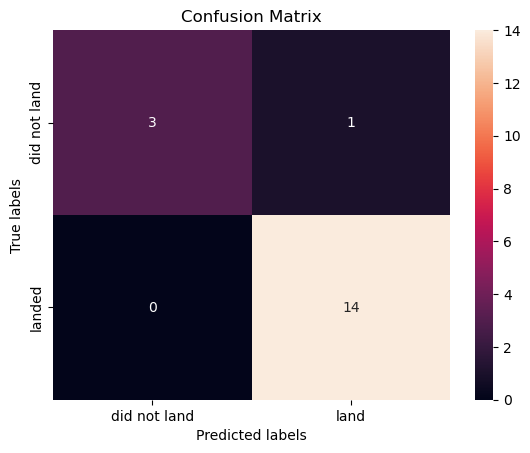

In [14]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## S.V.M Model

Creating a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10. Than Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [15]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [16]:
# Creating a GridSearchCV object with SVM as the estimator, parameters to search, and using 10-fold cross-validation
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fitting the GridSearchCV object to find the best hyperparameters
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [17]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.832142857142857


Calculating the accuracy on the test data using the method <code>score</code>:


In [18]:
Y_pred = svm_cv.predict(X_test)
# Calculate the accuracy on the test data
accuracy_svm = accuracy_score(Y_test, Y_pred)

# Print the accuracy
print(f'Accuracy on the test data: {accuracy_svm:.4f}')

Accuracy on the test data: 0.8889


We can plot the confusion matrix


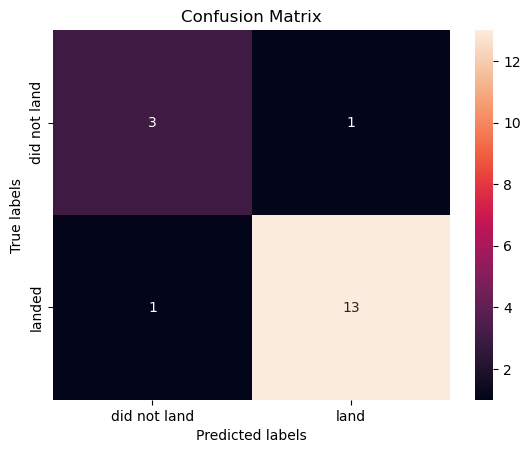

In [19]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## Decision Tree

Creating a decision tree classifier object then  creating a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Than Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [20]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [21]:
# Creating a GridSearchCV object with tree as the estimator, parameters to search, and using 10-fold cross-validation
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Fitting the GridSearchCV object to find the best hyperparameters
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [22]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.8732142857142857


Calculating the accuracy of tree_cv on the test data using the method <code>score</code>:


In [23]:
Y_pred = tree_cv.predict(X_test)
# Calculate the accuracy on the test data
accuracy_dt = accuracy_score(Y_test, Y_pred)

# Print the accuracy
print(f'Accuracy on the test data: {accuracy_dt:.4f}')

Accuracy on the test data: 0.8889


We can plot the confusion matrix


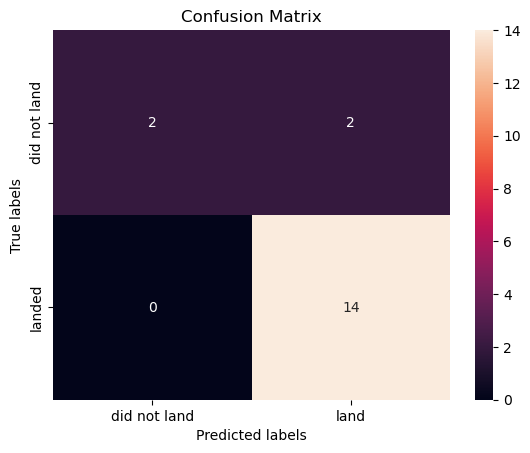

In [24]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

   ## K-Nearest Neighbors

Creating a k nearest neighbors object then  creating a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10. After that Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [25]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [26]:
# Creating a GridSearchCV object with knn as the estimator, parameters to search, and using 10-fold cross-validation
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Fitting the GridSearchCV object to find the best hyperparameters
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [27]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1}
accuracy : 0.8446428571428569


Calculating the accuracy of knn_cv on the test data using the method <code>score</code>:


In [28]:
Y_pred = knn_cv.predict(X_test)
# Calculate the accuracy on the test data
accuracy_knn = accuracy_score(Y_test, Y_pred)

# Print the accuracy
print(f'Accuracy on the test data: {accuracy_knn:.4f}')

Accuracy on the test data: 0.9444


We can plot the confusion matrix


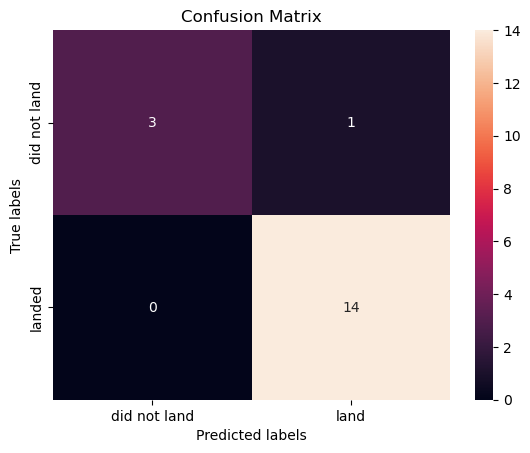

In [29]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Let's find out which method performs best.


In [30]:
accuracies = {
    'Logistic Regression': accuracy_lr,
    'SVM': accuracy_svm,
    'Decision Tree': accuracy_dt,
    'KNN': accuracy_knn
}

In [31]:
accuracies

{'Logistic Regression': 0.9444444444444444,
 'SVM': 0.8888888888888888,
 'Decision Tree': 0.8888888888888888,
 'KNN': 0.9444444444444444}

In [32]:
# Find the best-performing model
best_model = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model]

In [33]:
# Find the best-performing model or models
best_models = [model for model, accuracy in accuracies.items() if accuracy == best_accuracy]

In [34]:
# Display the best model or models
if len(best_models) == 1:
    print(f"Best Model: {best_models[0]} with Accuracy: {best_accuracy}")
else:
    print(f"Tied Best Models: {', '.join(best_models)} with Accuracy: {best_accuracy}")

Tied Best Models: Logistic Regression, KNN with Accuracy: 0.9444444444444444


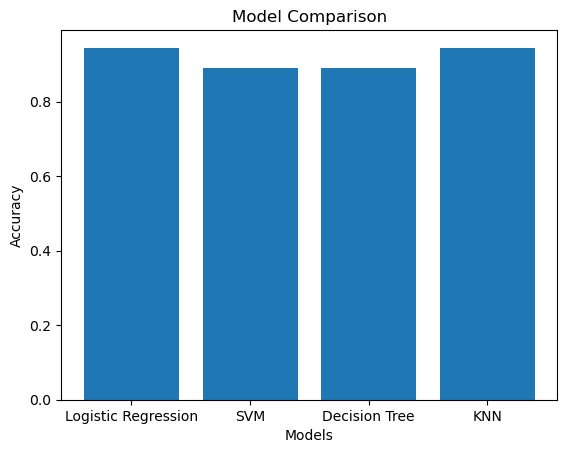

In [35]:
plt.bar(accuracies.keys(), accuracies.values())
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()

## Conclusion

In this collaborative effort, I constructed a machine learning pipeline to predict the landing outcome of the Space X Falcon 9 rocket's first stage. I employed Logistic Regression, Support Vector Machine (SVM), Decision Tree, and K-Nearest Neighbors (KNN) models.

I loaded and preprocessed the data, splitting it into training and testing sets. The models were fine-tuned using grid search over hyperparameters, and their performances were evaluated on the test set.

The results showed comparable accuracies among models:

Logistic Regression: 94.44%
SVM: 88.89%
Decision Tree: 88.89%
KNN: 94.44%

In this analysis, both Logistic Regression and K-Nearest Neighbors (KNN) models exhibit high accuracy, each achieving an accuracy of 94.44%. The similarity in performance suggests that both models are well-suited for predicting the landing outcome of the Space X Falcon 9 rocket's first stage.

The Logistic Regression model, with its 94.44% accuracy, and the KNN model, also with 94.44% accuracy, outperformed SVM and Decision Tree models in this specific prediction task. The confusion matrices provided a detailed breakdown of their predictive capabilities, showcasing their ability to distinguish between different landing outcomes.

The choice between Logistic Regression and KNN may depend on factors beyond accuracy, such as interpretability, computational efficiency, or specific requirements of the application. Further exploration and consideration of these factors can guide the selection of the most suitable model for the task at hand.